In [22]:
import Pynomic as pp
import numpy as np


In [2]:
flight_folder = "/home/juan/Desktop/PP_project/Pynomic/add_on/flights"
flight_path = '/home/juan/Desktop/pynomic_project/Pynomics/add_on/flights/20180917_Lamberton_GCP_transparent_mosaic.tif'
grid_path = '/home/juan/Desktop/PP_project/Pynomic/add_on/Grids/Labmert_test_grid.geojson'

In [3]:
vuelos = pp.process_stack_tiff(flight_folder, grid_path,col_id = 'fid', bands_n = ['red','green', 'blue'])

1/7 : 20180815_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
2/7 : 20180917_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
3/7 : 20180905_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
4/7 : 20180914_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
5/7 : 20180822_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
6/7 : 20180925_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615
7/7 : 20180829_Lamberton_GCP_transparent_mosaic.tif
Raster Coords system: EPSG:32615
Grid Coords system: EPSG:32615


In [4]:
vuelos.RGB_VI(Red='red',Blue='blue',Green='green')

In [15]:
preds = vuelos.get_senescens_predictions(band='VDVI', threshold =0.001)

Plot Id: A1 range is Higher than threshold 
Plot Id: A2 range is Higher than threshold 
Plot Id: A3 range is Higher than threshold 
Plot Id: A4 range is Higher than threshold 
Plot Id: A5 range is Higher than threshold 
Plot Id: A6 range is Higher than threshold 
Plot Id: A10 range is Higher than threshold 
Plot Id: A12 range is Higher than threshold 
Plot Id: A13 range is Higher than threshold 
Plot Id: A14 range is Higher than threshold 
Plot Id: A15 range is Higher than threshold 
Plot Id: A16 range is Higher than threshold 
Plot Id: A19 range is Higher than threshold 
Plot Id: A29 range is Higher than threshold 
Plot Id: A33 range is Higher than threshold 
Plot Id: A36 range is Higher than threshold 
Plot Id: A37 range is Higher than threshold 
Plot Id: A38 range is Higher than threshold 
Plot Id: A40 range is Higher than threshold 


(<Axes: >, <Axes: xlabel='Flight days', ylabel='VDVI'>)

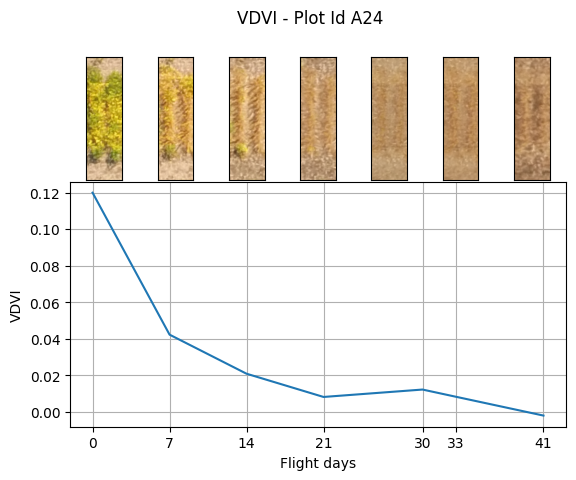

In [13]:
vuelos.plot.RGB_image_timeline(band_name="VDVI" , n_id = 'A24',Red='red',Blue='blue',Green='green', days= True)

In [17]:
preds.loc[preds.id == 'A1']

,id,fid,date,red,green,blue,ID,geometry,VDVI,NGRDI,...,GRRI,VEG,MGRVI,GLI,ExR,ExB,ExG,num_day,dpred,in_range
0,A1,1,20180815,129.180144,132.169504,64.339841,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.154674,0.011438,...,1.023141,1.290446,0.036156,-0.365952,0.149476,-0.129245,70.819023,0,39.0,lower
40,A1,1,20180917,196.813842,147.758235,89.487787,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.015838,-0.142367,...,0.750751,0.976066,-0.566450,-0.032186,0.294386,-0.051779,9.214841,33,39.0,lower
80,A1,1,20180905,182.692488,170.384256,57.613225,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.172892,-0.034860,...,0.932629,1.369645,-0.134335,-0.418062,0.207907,-0.218476,100.462798,21,39.0,lower
120,A1,1,20180914,193.236328,152.457682,90.923456,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.035234,-0.117962,...,0.788970,1.014119,-0.447374,-0.073042,0.270427,-0.057636,20.755580,30,39.0,lower
160,A1,1,20180822,136.894468,137.102309,64.549320,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.152972,0.000759,...,1.001518,1.286416,0.002480,-0.361197,0.161130,-0.138041,72.760831,7,39.0,lower
200,A1,1,20180925,184.615282,140.722860,94.513759,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.004133,-0.134913,...,0.762249,0.952630,-0.496937,-0.008300,0.280429,-0.020016,2.316680,41,39.0,lower
240,A1,1,20180829,150.934233,151.277373,66.832299,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.162954,0.001135,...,1.002273,1.314626,0.003791,-0.389354,0.162665,-0.156383,84.788214,14,39.0,lower


In [27]:
def VDVI_index(df):
        red = np.mean(df["red"])
        green = np.mean(df["green"])
        blue = np.mean(df["blue"])

        return [(2 * green - red - blue) / (2 * green + red + blue)]

data = vuelos.generate_unique_feature(VDVI_index, ["VDVI"])


In [42]:
data.loc[(data.id == 'A23') & (data.date == '20180815'), 'VDVI' ].values[0]

np.float64(0.11958853280011712)

In [44]:
vuelos.ldata.shape

(280, 18)

In [13]:
vuelos.save('/home/juan/Desktop/PP_project/Pynomic/add_on/zarr_data/trial.zarr')

In [14]:
v1 = pp.read_zarr('/home/juan/Desktop/PP_project/Pynomic/add_on/zarr_data/trial.zarr')

In [18]:
v1.dates

['20180815',
 '20180917',
 '20180905',
 '20180914',
 '20180822',
 '20180925',
 '20180829']

In [23]:
v1.raw_data['dates']['20180815']['A1']['red'][:]

array([[234, 229, 219, ..., 219, 219, 218],
       [224, 226, 218, ..., 212, 216, 219],
       [217, 214, 210, ..., 208, 213, 219],
       ...,
       [211, 220, 221, ..., 227, 224, 218],
       [213, 222, 220, ..., 228, 224, 220],
       [210, 215, 212, ..., 223, 222, 223]], dtype=uint8)

In [2]:
name = '20240919_loc'
if (re.search('_', name)):
    print(name.split("_")[0])

20240919


In [3]:
print(re.search(r'_', name))

<re.Match object; span=(8, 9), match='_'>


In [3]:
def read_grid(gpath, col_id: str):
    """Reads a geojson file.

    Args:
        gpath: grid path to a geojson file.

    Returns
    -------
        coordinate system of the grid.
        dict-like object with id and coords of each plot.
    """
    dics = {}
    if gpath.split(".")[1] == "geojson":
        plotgrids = open(gpath)
        plotgrids = json.load(plotgrids)
        crs_coords = plotgrids["crs"]["properties"]["name"]

        for p in plotgrids["features"]:
            dics[str(p["properties"][col_id])] = p["geometry"]["coordinates"][
                0
            ]

        return crs_coords, dics

    else:
        raise ValueError("Grid is not a geojson file")
    

def read_grid2(gpath, col_id:str):
    df = gdp.read_file(gpath)
    df[col_id] = df[col_id].astype(str)
    poligons_dict = df.copy().set_index(col_id).loc[:,'geometry'].to_dict()
    crs_coords = df.crs
    return crs_coords, poligons_dict


In [6]:
ad, cd = read_grid2(grid_path,'fid')

In [3]:
shapely.get_coordinates(cd['22'])

NameError: name 'cd' is not defined

In [4]:
df = gdp.read_file(grid_path)
df['fid'] = df['fid'].astype(str)
poligons_dict = df.copy().set_index('fid').loc[:,'geometry'].to_dict()

In [17]:
df['fid']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
Name: fid, dtype: object

NameError: name 'flight_folder' is not defined

In [2]:
vuelos.ldata

NameError: name 'vuelos' is not defined

In [5]:
import numpy as np

In [6]:
def VDVI_inex(df):
    red = np.mean(df['red'][:])
    green = np.mean(df['green'][:])
    blue = np.mean(df['blue'][:])

    return[(2*green - red - blue)/(2*green + red + blue)]

In [7]:
vuelos.generate_unique_feature(VDVI_inex,['VDVI'],to_data=True)

,id,fid,date,red,green,blue,ID,geometry,VDVI
0,1,1,20180815,129.180144,132.169504,64.339841,1,"POLYGON ((315803.555 4900902.953, 315803.647 4...",0.154674
1,2,2,20180815,125.377683,131.907013,61.482976,2,"POLYGON ((315803.647 4900904.542, 315803.738 4...",0.170751
2,3,3,20180815,129.649426,132.058198,65.336695,3,"POLYGON ((315803.738 4900906.132, 315803.829 4...",0.150577
3,4,4,20180815,173.122989,158.359240,69.833833,4,"POLYGON ((315803.829 4900907.721, 315803.921 4...",0.131794
4,5,5,20180815,145.584752,141.653868,72.492968,5,"POLYGON ((315803.921 4900909.31, 315804.012 49...",0.130100
...,...,...,...,...,...,...,...,...,...
475,36,36,20180808,140.052090,137.438701,65.010299,36,"POLYGON ((315766.706 4900905.024, 315766.797 4...",0.145466
476,37,37,20180808,127.585859,127.112894,65.720836,37,"POLYGON ((315766.797 4900906.614, 315766.888 4...",0.136122
477,38,38,20180808,136.892951,129.128537,67.512299,38,"POLYGON ((315766.888 4900908.203, 315766.98 49...",0.116396
478,39,39,20180808,141.797180,131.045698,72.473311,39,"POLYGON ((315766.98 4900909.792, 315767.071 49...",0.100388


In [10]:
import numpy as np
import pandas as pd 

In [10]:
vuelos.ldata

,id,date,red,green,blue,VDVI
0,1,20180815,121.831579,126.595538,59.382952,0.165690
1,2,20180815,121.474371,128.774828,58.871510,0.176306
2,3,20180815,126.370549,129.016797,63.183651,0.152997
3,4,20180815,174.389170,158.036699,68.549026,0.130829
4,5,20180815,142.689922,138.811870,71.183315,0.129707
...,...,...,...,...,...,...
275,36,20180829,188.956748,155.526947,66.954937,0.097258
276,37,20180829,162.666079,147.658472,58.692537,0.143143
277,38,20180829,185.320922,148.891290,77.936946,0.061537
278,39,20180829,182.743783,150.730039,77.950153,0.072518


In [11]:
vuelos.n_dates

7

In [12]:
vuelos.ldata.columns

Index(['id', 'date', 'red', 'green', 'blue', 'VDVI'], dtype='object')

In [14]:
vuelos.generate_unique_feature(VDVI_inex,'VDVI',to_data=False)

,id,date,VDVI
0,1,20180815,0.165690
1,2,20180815,0.176306
2,3,20180815,0.152997
3,4,20180815,0.130829
4,5,20180815,0.129707
...,...,...,...
275,36,20180829,0.097258
276,37,20180829,0.143143
277,38,20180829,0.061537
278,39,20180829,0.072518


In [18]:
vuelos.ldata.loc[275,'VDVI_x']

0.09725847938267855

In [ ]:
assertRaises

In [29]:
for x in [1,2,3,4,5]:
    if x == 4:
        try:
            print(1-'3')
        except ValueError as e:
            print('hola') 
    else:
        print(x)

1
2
3


TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [33]:
for x in [1,2,3,4,5]:
    if x == 4:
        try:
            raise ValueError('hola')
        except ValueError as e:
            print(e)
    else:
        print(x)

1
2
3
hola
5


In [35]:
vuelos['n_band']

KeyError: 'n_band'